### O banco de dados analisado traz consigo uma lista detalhada de clientes da Telecom no qual está inserido: os serviços prestados, taxas/métodos de pagamento, rotatividade do cliente e etc. Partindo desse pressuposto o objetivo desse trabalho é avaliar e prever a rotatividade de clientes que não irão renovar seus contratos.

In [3]:
import sklearn as sl
import numpy as np
from dfply import *
import pandas as pd
import dfply
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [4]:
dados = pd.read_csv("telecom_users.csv" , sep = ',')

In [5]:
# Visualizando as primeiras linhas
dados >> head(12)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [6]:
#Excluindo colunas 
dados.drop(labels=["Unnamed: 0","customerID"], axis=1, inplace=True, errors='raise')

In [7]:
# Visualizando as dimensões
dados.shape

(5986, 20)

In [8]:
# Formato de dados
dados.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Detectar valores ausentes
dados.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Descartandos as linhas com valores ausentes
dados.dropna(axis = 0)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [11]:
#Transformando as features em binária ordinal

from category_encoders.ordinal import OrdinalEncoder
enc = OrdinalEncoder(cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines',  'InternetService',  'OnlineSecurity',  'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV',  'StreamingMovies',  'Contract',  'PaperlessBilling',
               'PaymentMethod' ,'Churn'])
enc.fit(dados)
dados.ord = enc.transform(dados)

### Formatação das features

In [12]:
dados.ord['tenure'] = pd.to_numeric(dados.ord['tenure'], errors='coerce')
dados.ord['SeniorCitizen'] = pd.to_numeric(dados.ord['SeniorCitizen'], errors='coerce')
dados.ord['Partner'] = pd.to_numeric(dados.ord['Partner'], errors='coerce')
dados.ord['Dependents'] = pd.to_numeric(dados.ord['Dependents'], errors='coerce')
dados.ord['PhoneService'] = pd.to_numeric(dados.ord['PhoneService'], errors='coerce')
dados.ord['MultipleLines'] = pd.to_numeric(dados.ord['MultipleLines'], errors='coerce')
dados.ord['InternetService'] = pd.to_numeric(dados.ord['InternetService'], errors='coerce')
dados.ord['OnlineSecurity'] = pd.to_numeric(dados.ord['OnlineSecurity'], errors='coerce')
dados.ord['OnlineBackup'] = pd.to_numeric(dados.ord['OnlineBackup'], errors='coerce')
dados.ord['DeviceProtection'] = pd.to_numeric(dados.ord['DeviceProtection'], errors='coerce')
dados.ord['TechSupport'] = pd.to_numeric(dados.ord['TechSupport'], errors='coerce')
dados.ord['StreamingTV'] = pd.to_numeric(dados.ord['StreamingTV'], errors='coerce')
dados.ord['StreamingMovies'] = pd.to_numeric(dados.ord['StreamingMovies'], errors='coerce')
dados.ord['Contract'] = pd.to_numeric(dados.ord['Contract'], errors='coerce')
dados.ord['PaperlessBilling'] = pd.to_numeric(dados.ord['tenure'], errors='coerce')
dados.ord['PaymentMethod'] = pd.to_numeric(dados.ord['PaymentMethod'], errors='coerce')
dados.ord['MonthlyCharges'] = pd.to_numeric(dados.ord['MonthlyCharges'], errors='coerce')
dados.ord['TotalCharges'] = pd.to_numeric(dados.ord['TotalCharges'], errors='coerce')
dados.ord['gender'] = pd.to_numeric(dados.ord['gender'], errors='coerce')
dados.ord['Churn'] = pd.to_numeric(dados.ord['Churn'], errors='coerce')

In [13]:
# Visualização do formato dos dados
dados.ord.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [14]:
# Retirando os NA's
dados.ord.fillna(-99999, inplace=True)

**A correlação de Pearson mede o grau da relação linear entre cada par de itens ou variáveis, objetivando avaliar a direção da relação entre duas variáveis, oscilando entre -1 e 1.**

In [15]:
# Correlação
dados.ord.corr()["Churn"]

gender              0.009548
SeniorCitizen       0.150097
Partner             0.146840
Dependents          0.160204
tenure             -0.348469
PhoneService       -0.009421
MultipleLines      -0.032166
InternetService     0.047198
OnlineSecurity      0.018857
OnlineBackup        0.287948
DeviceProtection    0.279261
TechSupport         0.026380
StreamingTV         0.203010
StreamingMovies     0.159190
Contract            0.084755
PaperlessBilling   -0.348469
PaymentMethod       0.112766
MonthlyCharges      0.186753
TotalCharges       -0.072809
Churn               1.000000
Name: Churn, dtype: float64

**Conclusões**

1º - Ao visualizar a Matriz de correlação nota-se que não há nenhuma variavel que correlacione de forma significativa com a variável resposta (Churn), visto que uma boa relação fica em torno de 0,7.

<AxesSubplot:>

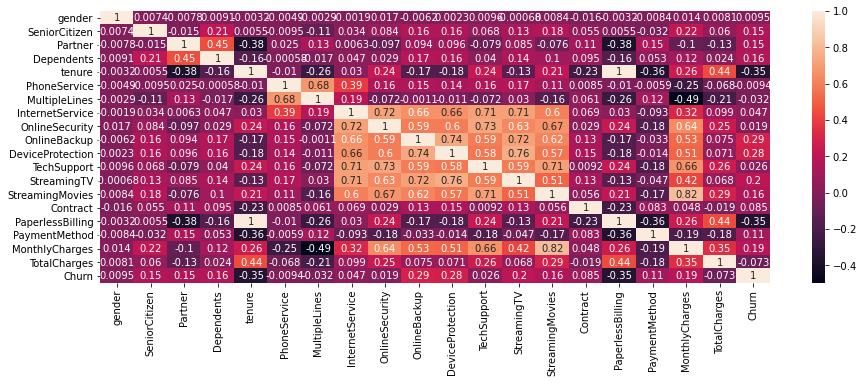

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(dados.ord.corr(),annot= True)

**Conclusões**

1º - Serviço de Internet tem uma correlação positiva com, Online security (0,71), Streaming Tv (0,71) e Payment method (0,93).

2º - tenure tem uma correlação positiva com Paperless Billing (1) , e com total charges (0,83).

3º - Partner tem uma correlação positiva com Streaming TV (0,85) e Streaming Movies (0,76) e Tec support (0,73).

4º - Entre as relações das variáveis não ocorreu uma correlação negativa forte.

In [18]:
# organizando as variáveis para o modelo
X = dados.ord[['tenure','gender','SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines',  'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV',  'StreamingMovies',  'Contract',  'PaperlessBilling',
               'PaymentMethod','MonthlyCharges','TotalCharges']]
               
y = dados.ord["Churn"]  

**Dividindo o dataset em treino e teste**

In [19]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y,  test_size = 0.7, random_state = 0)

**Importando pacotes**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

**Criação dos modelos**

Vão ser criados 6 modelos: **Regressão logística, Árvore de decisão, Adaboost, Knn, Random Forest e XgBoosting**. Em seguida ocorrerá a avaliação da acurácia, precissão, recall, f_1 score e Matriz de correlação.

In [25]:

def generate_model_report(y_teste, y_pred):
    print("Accuracy = ", accuracy_score(y_teste, y_pred))
    print("Precision = ", precision_score(y_teste, y_pred))
    print("Recall = ", recall_score(y_teste, y_pred))
    print("F1 = ", f1_score(y_teste, y_pred))
    pass

In [27]:
#Regressão logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(x_treino,y_treino)

clf

y_pred = clf.predict(x_teste)

generate_model_report(y_teste, y_pred)

cm = confusion_matrix(y_teste, y_pred)
print(cm)

Accuracy =  0.7871629682653305
Precision =  0.8286059143029572
Recall =  0.8944625407166124
F1 =  0.8602756892230576
[[2746  324]
 [ 568  553]]


In [28]:
# Árvore de decisão
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(x_treino,y_treino)

y_pred2 = clf2.predict(x_teste)


cm = confusion_matrix(y_teste, y_pred2)
print(cm)
generate_model_report(y_teste, y_pred2)

[[2503  567]
 [ 618  503]]
Accuracy =  0.7172512526843235
Precision =  0.8019865427747517
Recall =  0.8153094462540716
F1 =  0.8085931190437733


In [29]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 0)
clf3 = clf3.fit(x_treino,y_treino)

y_pred3 = clf3.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred3)
print(cm)
generate_model_report(y_teste, y_pred3)

[[2682  388]
 [ 533  588]]
Accuracy =  0.7802433786685755
Precision =  0.8342146189735614
Recall =  0.8736156351791531
F1 =  0.8534606205250597


In [30]:
# Knn
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier()
clf4 = clf4.fit(x_treino,y_treino)

y_pred4 = clf4.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred4)
print(cm)
generate_model_report(y_teste, y_pred4)

[[2738  332]
 [ 673  448]]
Accuracy =  0.760200429491768
Precision =  0.8026971562591615
Recall =  0.89185667752443
F1 =  0.844931337756519


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier()
clf5 = clf5.fit(x_treino,y_treino)

y_pred5 = clf5.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred5)
print(cm)
generate_model_report(y_teste, y_pred5)

[[2763  307]
 [ 624  497]]
Accuracy =  0.7778573132903842
Precision =  0.8157661647475642
Recall =  0.9
F1 =  0.8558153941458881


In [32]:
#Xgboost
from xgboost import XGBClassifier

clf6 = XGBClassifier()
clf6 = clf6.fit(x_treino,y_treino)

y_pred6 = clf6.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred6)
print(cm)
generate_model_report(y_teste, y_pred6)

[11:24:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2668  402]
 [ 601  520]]
Accuracy =  0.7606776425674063
Precision =  0.8161517283572958
Recall =  0.8690553745928339
F1 =  0.8417731503391702


In [33]:
# Criando uma tabela com os resultados do modelo

USData = pd.DataFrame(np.array(
[[0.79 , 0.78, 0.76 , 0.77 ,0.76, 0.71], [0.78, 0.83, 0.81, 0.81, 0.80, 0.80],
 [0.82, 0.87, 0.89, 0.89, 0.89, 0.81],[0.86, 0.85, 0.84, 0.85, 0.84, 0.80]]),
columns =['Regressão logística', 'AdaBoost','Xgboost','Random Forest','knn', 'Árvore de decisão'],
index = ['Accuracy','Precision','Recall','F1'])

USData >> head()

,Regressão logística,AdaBoost,Xgboost,Random Forest,knn,Árvore de decisão
Accuracy,0.79,0.78,0.76,0.77,0.76,0.71
Precision,0.78,0.83,0.81,0.81,0.80,0.80
Recall,0.82,0.87,0.89,0.89,0.89,0.81
F1,0.86,0.85,0.84,0.85,0.84,0.80


**Avaliação da tabela**

Antes de avaliar essa tabela, precisamos entender o que cada conceito representa

**Accuracy** - Explica o quão bem nosso modelo acertou nas previsões possivéis, ou seja, se de 10 previsões ele acertou 8, isso implica dizer que o modelo teve uma acurácia de 80%.

**Recall** - Mostra o quão bom é o modelo para prever positivos, sendo positivo a classe que se quer prever.

**Precision** - Mostra as previsões que foram realmentes corretas, ou seja, o quão bem o modelo trabalhou.

**F1** - Mostra o balanço entre a precisão e o recall do modelo.

Conclusões:

1º - A Regressão logística foi o modelo que teve a maior acurácia com 0,79% já oAdaBoost com um valor próximo obteve 0,78% de acurácia, logo em seguida: Random Forest com 0,77% e Xgboost com 76%, a Árvore de decisão teve o menor poder preditivo, com 0,71%.

2º - Dos seis modelos quem teve a maior precisão foi o Adaboost com 0,83% em seguida o XgBoost com 0,80%, já a regressão logística foi a que teve um menor desempenho entre os modelos com 0,78%, o que significa uma maior variabilidade entre os valores obtidos.

3º - O XgBoost, Random Forest e Knn tiveram o melhor Recall ambos com 0,89%, já o Adaboost teve 0,87%. Implicando afirmar que as porcentagens desses modelos minimizam de forma significativa os falsos negativos.

4º - O maior valor foi o da Regressão logística com 0,86. É uma métrica melhor que a Acurácia, principalmente em casos onde falsos positivos e falsos negativos possuem impactos diferentes para seu modelo.

## Shap

**Como os valores das 4 modelos foram similares, escolheremos o Random Forest para uma melhor compreensão dos resultados, avaliando como cada valor de cada variável influenciou no resultado alcançado pelo modelo preditivo. utilizando o pacote Shap.**

Vale ressaltar que os resultados dessa interpretação pode variar de modelo para modelo.

In [34]:
import shap
#carregar JS visualização de codigo para o notebook
shap.initjs()

In [35]:
explainer = shap.TreeExplainer(clf5)
shap_values = explainer.shap_values(x_treino)

In [36]:
explainer
shap_values[1].shape

(1795, 19)

**Gráfico de força**

In [37]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], x_teste.iloc[0,:])

**Avaliação do gráfico**

Conclusões

1º - O valor de saída do modelo : 1.00

2º - O valor base : este é o valor que seria previsto se não tivéssemos nenhum recurso para a saída atual (valor base: **0.7405**).

3º - No eixo x, mostra o impacto de cada recurso na saída.

A partir do gráfico gerado, fica evidente observar as features que colaboraram para aumentar (higher) o valor em relação ao base value foram as que estão em vermelho, já as que colaboraram para a diminuição (lower) em direção ao valor base foram as features em azul.

In [38]:
shap.force_plot(explainer.expected_value[0], shap_values[1][0,:], x_teste.iloc[0,:])

Avaliação do gráfico

Conclusões

1º - O valor de saída do modelo : 0.48

2º - O valor base : este é o valor que seria previsto se não tivéssemos nenhum recurso para a saída atual (valor base: **0.7405**).

3º - No eixo x, mostra o impacto de cada recurso na saída.

Assim, a partir desse plot pode-se observar o comportamento que cada feature tem para se realizar a previsão da rotatividade dos clientes.

**Avaliação geral do conjunto de treino em relação a predição do nosso modelo**

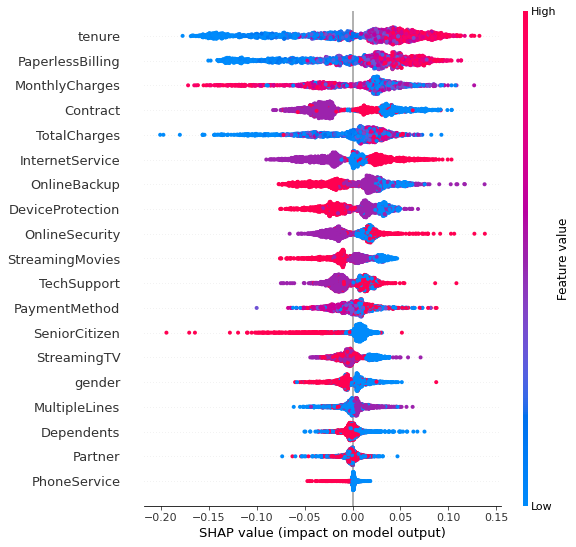

In [39]:
shap.summary_plot(shap_values[0], x_treino)

**Avaliação do gráfico**

Antes de avaliar o que este gráfico quer nos dizer sobre o nosso problema, precisamos entender cada característica nele presente:

1º - O eixo Y são as variáveis do nosso modelo em ordem de importância (o SHAP ordena isso de forma padrão, você pode escolher outra ordem através dos parâmetros)

2º - O eixo X são os valores SHAP. Como a nossa referência é a categoria positiva então valores positivos indicam um suporte para a categoria de referência (contribui pro modelo responder categoria positiva no final) e valores negativos indicam um suporte à categoria oposta (neste caso de classificação binária, seria a classe negativa)

3º - Cada ponto no gráfico representa uma amostra. Cada variável possui 1795 pontos distribuídos horizontalmente (visto que temos 1795 amostras, logo cada amostra tem um valor para aquela variável). Note que essas nuvens de pontos em algum momento se expande verticalmente. Isso ocorre dado a densidade de valores daquela variável em relação aos valores SHAP.

4º - Finalmente, as cores representam o aumento/diminuição do valor da variável, onde tons mais vermelhos são valores altos e tons azulados são valores mais baixos.

**De forma geral, iremos buscar variáveis que:**

5º - Tenham uma divisão bem clara de cores, ou seja, vermelho e azul em lugares opostos. Essa informação mostra que elas são boas preditoras, afinal apenas ao mudar seu valor o modelo consegue verificar de forma mais fácil qual categoria é a correta.

6º - Associado a isso, quanto maior o intervalo de alcance de valores SHAP, melhor será aquela variável para o modelo. Vamos considerar **Monthly charges**, que apresenta em algumas situações valores de SHAP em torno de **0,15**, ou seja, **15%** de contribuição para o resultado do modelo (isso porque o máximo que qualquer variável pode atingir é **50%**).

7º - Vale destacar também as variáveis **gender e Streaming tv** que não possuem um intervalo tão grande como **Monthly changes**, porém demonstra uma divisão clara de cores.

8º - As variáveis **Partner e Phone Service**: No geral, são variáveis confusas visto que seus valores SHAP ficam em torno de 0 (contribuições fracas) e com uma clara mistura de cores, visto que você não consegue ver uma tendência do aumento/diminuição dessa variável na resposta final.

Por meio desse gráfico, você consegue tirar um panorama geral de como seu modelo chega a suas conclusões a partir do conjunto de treinamento.

**O gráfico seguinte mostra uma contribuição média do gráfico que apresentamos anteriormente:**

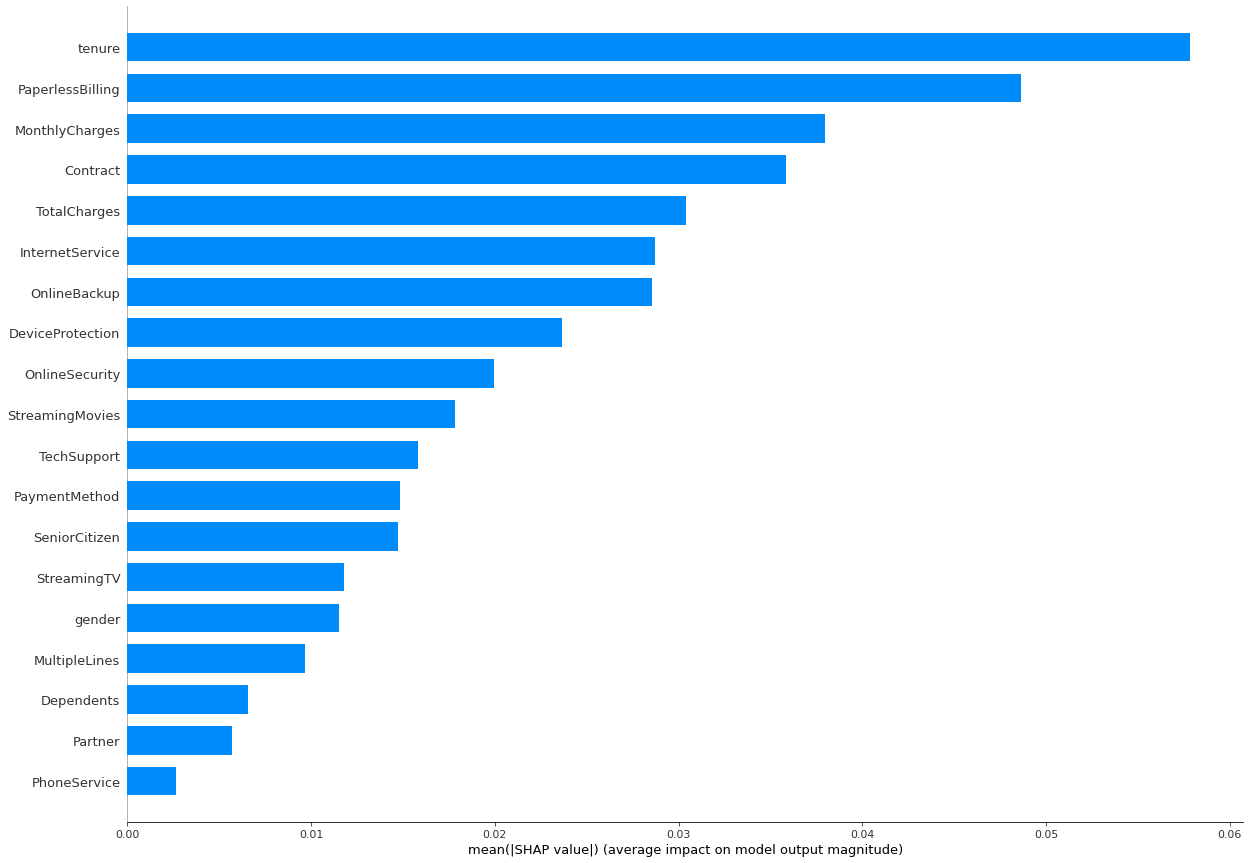

In [40]:
shap.summary_plot(shap_values[1], x_treino, plot_type="bar", plot_size=(20,15));

**Conclusões**

Basicamente como o próprio título do eixo X demonstra, cada barra representa a média dos valores SHAP em módulo, assim avaliamos a contribuição média das variáveis nas respostas do modelo. Considerando a **tenure**, vemos que sua contribuição média gira em torno de **5%** para a categoria positiva.

Este gráfico pode ser feito em relação a qualquer uma das categorias (optei pela positiva) ou em relação à ambas. Ela configura como um ótimo gráfico para substituir o anterior em explicações para gestores ou pessoas mais ligadas na área de negócio dado sua simplicidade.

**No gráfico abaixo, vamos avaliar a relação entre as duas variáveis mais importantes do modelo usando com referência a categoria positiva:**

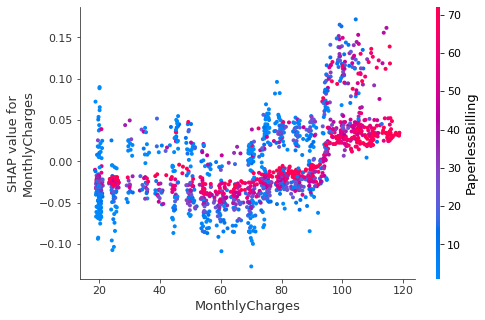

In [41]:
shap.dependence_plot("MonthlyCharges", shap_values[1], x_treino, interaction_index = "PaperlessBilling")

**Avaliação do gráfico**

**Conclusões**

Antes de analisar este gráfico, precisamos entender suas características:

1º - O eixo X são os valores da variável **Monthly Charges**

2º - O eixo Y são os valores SHAP calculados para variável **Monthly Charges**

3º - As cores dos pontos são os valores da segunda variável: **Paperless Billing**. Note novamente que da cada ponto representa uma amostra, totalizando assim 1795 pontos no gráfico.

4º - De início conseguimos perceber uma certa tendência linear: a medida que a variável **Monthly Charges** aumenta, os valores SHAP aumentam. Cores mais avermelhadas (indicam maiores valores de **Monthly Charges**, logo conseguimos perceber que relações onde temos alto valor de **Monthly Charges** e **Paperless Billing** podem indicar uma maior probabilidade do modelo responder como categoria positiva. Este tipo de resultado é bem interessante de encontrar.



